In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

# Ice Cream Production Data

In [4]:
df_ice = pd.read_csv("ice_cream.csv")
df_ice.head(3)

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350


In [9]:
#rename column name to something understandable

df_ice.rename(columns= {"DATE":'date',"IPN31152N":"production"},inplace = True)

In [12]:
df_ice.rename(columns = {"data":"date"},inplace = True)
df_ice.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [13]:
#convert date to datetype 
df_ice["date"] = pd.to_datetime(df_ice.date)

In [14]:
#set date as index
df_ice.set_index("date",inplace =True)

In [17]:
#just get data from 2010
start_date = pd.to_datetime("2010-01-01")
df_ice = df_ice[start_date:]

In [18]:
df_ice.head(5)

,production,date
date,,
2010-01-01,91.2895,91.2895
2010-02-01,110.4994,110.4994
2010-03-01,127.0971,127.0971
2010-04-01,132.6468,132.6468
2010-05-01,134.5576,134.5576


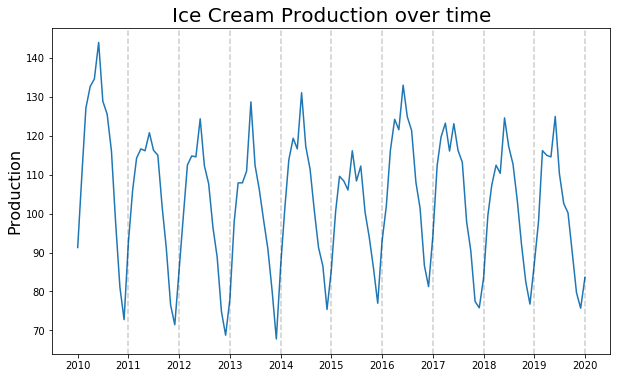

In [23]:
#plot the data
plt.figure(figsize= (10,6))
plt.plot(df_ice.production)
plt.title("Ice Cream Production over time",fontsize = 20)
plt.ylabel("Production",fontsize = 16)

for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color = "k",linestyle = "--",alpha = 0.2)

# ACF

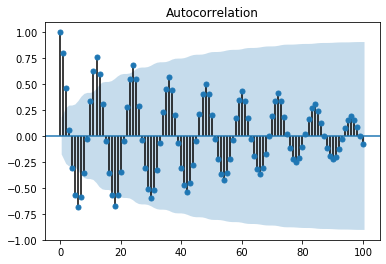

In [25]:
acf_plot = plot_acf(df_ice.production,lags = 100)


# PACF

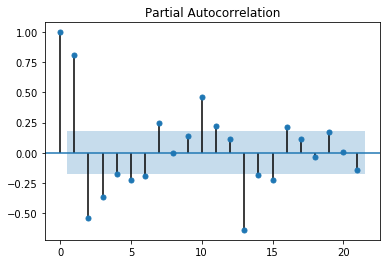

In [27]:
pacf_plot = plot_pacf(df_ice.production)

## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13¶

# ON stock DATA

In [28]:
import yfinance as yf

In [29]:
#define ticker symbol
tickersymbol = "SPY"

In [30]:
tickerdata = yf.Ticker(tickersymbol)

In [33]:
#get the historical data for this ticker
tickerDf = tickerdata.history(period = "1d",start = "2015-01-01",end = "2020-01-01")

In [37]:
tickerDf = tickerDf[["Close"]]

In [38]:
tickerDf.head(4)

,Close
Date,
2014-12-31,182.247574
2015-01-02,182.149979
2015-01-05,178.860443
2015-01-06,177.175781


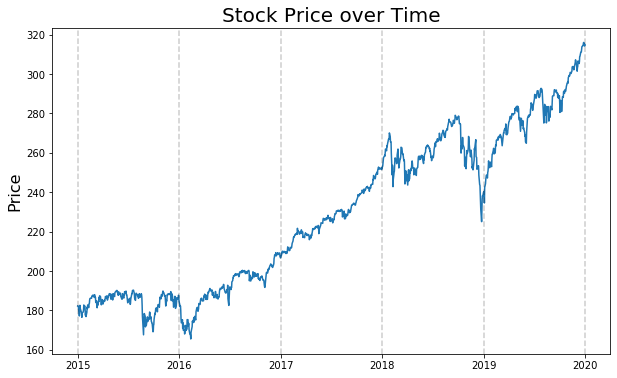

In [40]:
#plot the data
plt.figure(figsize = (10,6))
plt.plot(tickerDf.Close)
plt.title("Stock Price over Time",fontsize = 20)
plt.ylabel("Price",fontsize =16)

for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color = "k",linestyle = "--",alpha = 0.2)

# Stationary:take the first difference of this time series

In [43]:
#take first diff
first_diff = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diff = np.concatenate([first_diff,[0]])

In [44]:
#set first difference as variable in dataframe
tickerDf["firstDifference"] = first_diff

In [45]:
tickerDf.head(4)

,Close,firstDifference
Date,,
2014-12-31,182.247574,-0.097595
2015-01-02,182.149979,-3.289536
2015-01-05,178.860443,-1.684662
2015-01-06,177.175781,2.207809


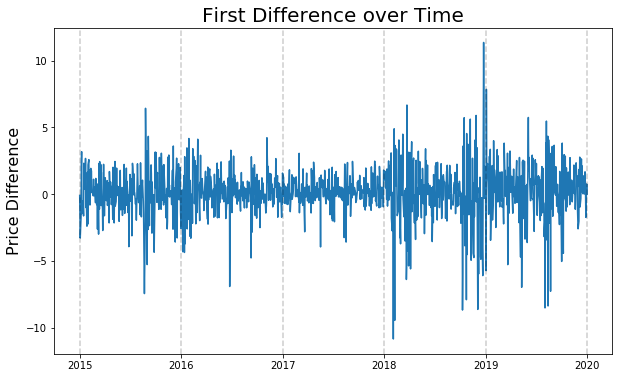

In [46]:
plt.figure(figsize = (10,6))
plt.plot(tickerDf.firstDifference)
plt.title("First Difference over Time",fontsize = 20)
plt.ylabel("Price Difference",fontsize =16)

for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color = "k",linestyle = "--",alpha = 0.2)

# ACF

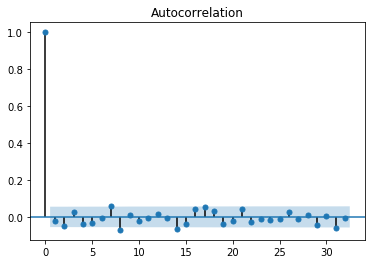

In [49]:
acf_plot = plot_acf(tickerDf.firstDifference)

# PACF

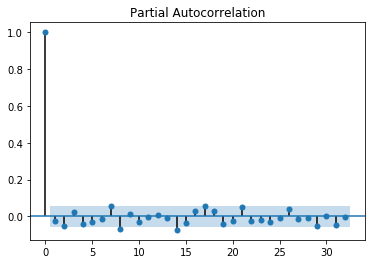

In [51]:
pacf_plot = plot_pacf(tickerDf.firstDifference)